# Xtern Data Science Work Sample: FoodieX

## Goal Review the data and draw four conclusions you can find from the data set

### Set Up

In [59]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

fd = pd.read_csv("2020-XTern-DS.csv")

### Display Dataset

In [60]:
# Removed New and Opening Soon data sets
fd = fd[fd.Rating != "NEW"]
fd = fd[fd.Rating != "Opening Soon"]
fd = fd[fd.Rating != "-"]

fd

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2011,ID_3928,39.353682,-85.071878,"North Indian, South Indian, Chinese, Fast Food",$25.00,$50.00,3.3,29,6,45 minutes
2012,ID_3201,39.039147,-85.114505,"Beverages, Fast Food",$15.00,$50.00,3.7,22,16,30 minutes
2013,ID_5794,39.764745,-85.121567,Bengali,$20.00,$50.00,3.3,16,6,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes


In [61]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     1666 non-null   object 
 1   Latitude       1666 non-null   float64
 2   Longitude      1666 non-null   float64
 3   Cuisines       1666 non-null   object 
 4   Average_Cost   1666 non-null   object 
 5   Minimum_Order  1666 non-null   object 
 6   Rating         1666 non-null   object 
 7   Votes          1666 non-null   object 
 8   Reviews        1666 non-null   object 
 9   Cook_Time      1666 non-null   object 
dtypes: float64(2), object(8)
memory usage: 143.2+ KB


In [62]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

avg_cost= fd['Average_Cost'].apply(convert_currency)
min_ord = fd['Minimum_Order'].apply(convert_currency)

In [77]:
def convert_time(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '').replace('minutes', '')
    return float(new_val)

## Question 1: Is there a positive relationship between Average cost and Ratings?

Null Hypothesis: There is a positive relationship between average cost and ratings
Alternative Hypothesis: There is no relationship at all between average cost and ratings.

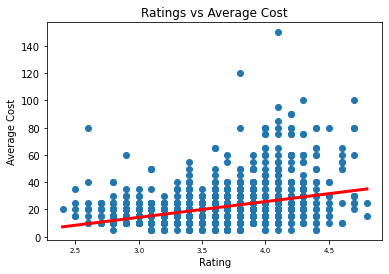

<Figure size 72x360 with 0 Axes>

In [73]:
fd = fd.sort_values(by = "Rating", ascending = False)
y = fd['Average_Cost'].apply(convert_currency)
x = fd['Rating'].apply(convert_currency)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red", linewidth=3)

plt.scatter(x, y)

plt.xlabel("Rating")
plt.ylabel("Average Cost")

plt.xticks(fontsize=7)
plt.yticks(fontsize=10)
plt.title("Ratings vs Average Cost")
plt.figure(figsize=(1,5))

plt.show()

### Analysis

In [75]:
mean_avg_cost = fd.Average_Cost.mean
std_cost = fd.Average_Cost.std

mean_rating = fd.Rating.mean
std_rating = fd.Rating.std

## Mean Avg Cost = 15, STD = 15
## Mean Rating = 4.8, STD = 4.8
x = fd['Average_Cost'].apply(convert_currency)
y = fd['Rating'].apply(convert_currency)

c_1 = (x - 15)/15
c_2 = (y - 4.8)/ 4.8
n = 1666

print(sum((c_1 * c_2)/(1666-1)))
# Correlation = -0.0748

-0.07483316649983317


## Conclusion #1

Looking at the graph, we see a positive regressing line (red). With a correlation value of |-0.075| was 0.075, which was more than the significant value of 0.05. Based off of this, we do not reject the null hypothesis. The result does not support the alternative. We cannot say that their is a positive relationship, but with the linear regression line showing a positive slope, I cannot say there isn't either. I would believe that there is a positive relationship between Rating and Average Cost, but there is no evidence for this.

# Question 2: What location is the best?

I will determine this based off of rating. With this as my factor in determining who is the best, I can say that resturants ID_7412 and ID_4728 are the best. We can use vote ratio as a tiebreaker (votes/reviews). Location 7412 had a ratio of 1.39 votes per review and location 4728 had a ratio of 1.53. So now with the tiebreaker decided and analyzed, location 4728 is the best! Here is a visual showing that:

In [65]:
fd = fd.sort_values(['Rating', 'Votes'], ascending = False)
fd

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
1325,ID_4728,39.135109,-85.830490,"North Indian, Mughlai, Biryani, Rolls, Momos",$25.00,$99.00,4.8,650,423,45 minutes
169,ID_7412,39.382427,-85.499864,"North Indian, Chinese, Rolls",$15.00,$50.00,4.8,326,234,30 minutes
35,ID_1160,39.246289,-85.152915,"Asian, Burmese, Bubble Tea, Desserts, Salad, T...",$60.00,$50.00,4.7,914,499,45 minutes
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",$80.00,$50.00,4.7,9054,6504,45 minutes
446,ID_1166,39.915714,-85.847807,North Indian,$30.00,$50.00,4.7,81,74,45 minutes
...,...,...,...,...,...,...,...,...,...,...
1345,ID_5242,39.895003,-85.622917,"Biryani, Chinese, North Indian",$25.00,$99.00,2.5,51,27,65 minutes
1549,ID_4718,39.987552,-85.757764,"North Indian, Mughlai",$35.00,$50.00,2.5,27,10,45 minutes
411,ID_4672,39.900847,-85.704130,"Chinese, North Indian",$15.00,$50.00,2.5,17,5,30 minutes
1968,ID_1197,39.922343,-85.273122,"Fast Food, Chinese, South Indian",$15.00,$50.00,2.5,12,9,30 minutes


## Conclusion #2

In conclusion, we have restuarants 4728 and 7412 tied for the highest rating at 4.8. For a tie breaker, I calculated the vote ratio, which was the number of votes/ number of reviews. Restuarant 4728 had the higher ratio at 1.53, so restuarant 4728 is the best restuarant.

# Question 3: Which restuarant serves the fastest and at the cheapest price?

I want to see what restuarant had the fastest cook time and has the cheapest average cost of their food. 

In [66]:
fd = fd.sort_values(['Cook_Time', 'Average_Cost'], ascending = False)
fd

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
558,ID_1368,39.615169,-85.507343,Bakery,$20.00,$50.00,4.2,242,94,80 minutes
784,ID_5879,39.072384,-85.734527,"North Indian, Mughlai, Kebab",$90.00,$450.00,4.2,1262,758,65 minutes
683,ID_5879,39.416346,-85.061462,"North Indian, Mughlai, Kebab",$90.00,$450.00,4.2,1262,758,65 minutes
1759,ID_2521,39.726518,-85.704359,"Mediterranean, Pizza, Italian, Beverages",$60.00,$50.00,4.4,467,262,65 minutes
771,ID_6080,39.349648,-85.955537,"Rajasthani, North Indian",$60.00,$50.00,4.3,860,484,65 minutes
...,...,...,...,...,...,...,...,...,...,...
596,ID_36,39.440505,-85.965610,"Bakery, Fast Food",$25.00,$50.00,2.7,5,3,120 minutes
928,ID_4204,39.382805,-85.271197,"Bakery, Fast Food, Desserts",$20.00,$50.00,3.7,147,72,120 minutes
424,ID_607,39.370590,-85.967792,"Bakery, Fast Food",$20.00,$50.00,3.7,101,44,120 minutes
1210,ID_8357,39.676069,-85.361422,"Bakery, Desserts",$20.00,$99.00,2.8,4,4,120 minutes


## Conclusion #3

Based on the table above, we can determine that restuarant 1368, has the lowest average pricing and has the fastest cook time

# Question #4: Does cook time affect rating?

Null: There is a correlation between cook time and rating

Alt: There is not a correlation between cook time and rating

In [67]:
fd = fd.sort_values(['Cook_Time', 'Rating'], ascending = False)
fd

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
558,ID_1368,39.615169,-85.507343,Bakery,$20.00,$50.00,4.2,242,94,80 minutes
1428,ID_2051,39.759886,-85.500507,"Italian, Continental, Chinese, Mexican, Fast F...",$30.00,$50.00,4.7,3975,2359,65 minutes
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",$50.00,$99.00,4.6,4903,3989,65 minutes
602,ID_8529,39.356060,-85.011488,"Cafe, Fast Food",$30.00,$50.00,4.5,1349,972,65 minutes
130,ID_7674,39.396174,-85.270298,"North Indian, Chinese",$25.00,$99.00,4.5,143,110,65 minutes
...,...,...,...,...,...,...,...,...,...,...
928,ID_4204,39.382805,-85.271197,"Bakery, Fast Food, Desserts",$20.00,$50.00,3.7,147,72,120 minutes
424,ID_607,39.370590,-85.967792,"Bakery, Fast Food",$20.00,$50.00,3.7,101,44,120 minutes
1210,ID_8357,39.676069,-85.361422,"Bakery, Desserts",$20.00,$99.00,2.8,4,4,120 minutes
1947,ID_1342,39.375015,-85.622034,Bakery,$15.00,$99.00,2.8,177,81,120 minutes


### Strip Plot of Rating vs Cook Time

Text(0.5, 1.0, 'Strip Plot of Rating vs Cook Time')

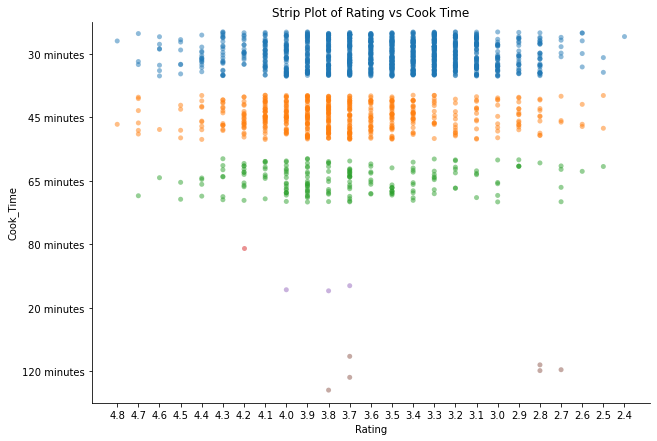

In [83]:
fd = fd.sort_values('Rating', ascending = False)
fig, ax = plt.subplots()
sns.stripplot(x='Rating', y='Cook_Time', data=fd, jitter=0.35, alpha = 0.50)
sns.despine()
fig.set_size_inches(10,7)
ax.set_title("Strip Plot of Rating vs Cook Time")

### Analysis and Scatter Plot:

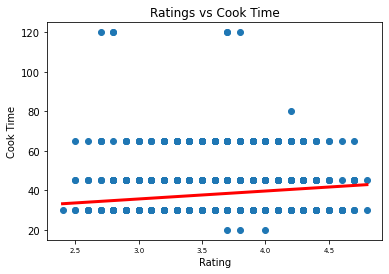

<Figure size 72x360 with 0 Axes>

In [78]:
fd = fd.sort_values(by = "Rating", ascending = False)
y = fd['Cook_Time'].apply(convert_time)
x = fd['Rating'].apply(convert_currency)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red", linewidth=3)

plt.scatter(x, y)

plt.xlabel("Rating")
plt.ylabel("Cook Time")

plt.xticks(fontsize=7)
plt.yticks(fontsize=10)
plt.title("Ratings vs Cook Time")
plt.figure(figsize=(1,5))

plt.show()

In [84]:
mean_cook_time = fd.Cook_Time.mean
std_cook_time = fd.Cook_Time.std

mean_rating = fd.Rating.mean
std_rating = fd.Rating.std

x = fd['Cook_Time'].apply(convert_time)
y = fd['Rating'].apply(convert_currency)

c_1 = (x - 15)/15
c_2 = (y - 4.8)/ 4.8
n = 1666

print(sum((c_1 * c_2)/(1666-1)))
# Correlation = -0.372

-0.37242659325992417


## Conclusion #4:

Looking at the strip plot above, we can see that most places had higher ratings when the cook time was about 45 minutes. With a correlation being |-0.372| = 0.372, this is higher than my confidence level of 0.05. We do not reject the null, and we do not support the alternative. There is no evidence saying this is or isn't a correlation between cook times and ratings. 

# Overall Conclusions:

To being with, I asked if there was a positive correlation between average costs and ratings, and there was no evidence to support nor deny that hypothesis. Then I looked to see what restuarant was the best based on ratings with a vote ratio being the tiebreaker. I was able to determine that ID 4728 is the best restuarant. In question 3, I looked for the lowest priced and quickest cooked place. Based on the table, we can determine that restuarant 1368, has the lowest average pricing and has the fastest cook time. Finally, I looked for a correlation between ratings and cook times, and in like analysis 1, there